# Marker gene hunt scripts

In [1]:
import datajoint as dj
dj.config.load('/Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json')
dj.conn()

/Users/neurozmar/Scripts/NDNF-behavior/.venv/lib/python3.13/site-packages/datajoint/plugin.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
[2025-12-24 11:05:26,450][INFO]: DataJoint is configured from /Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json
[2025-12-24 11:05:26,629][INFO]: DataJoint 0.14.6 connected to rozmar@cs16-datajoint.koki.local:3306


DataJoint connection (connected) rozmar@cs16-datajoint.koki.local:3306

## import packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from ndnf_pipeline import lab

/var/folders/t0/71r1kjy974g849pxq5s1zmfh0000gn/T/ipykernel_26889/2670599570.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = df.pivot_table(


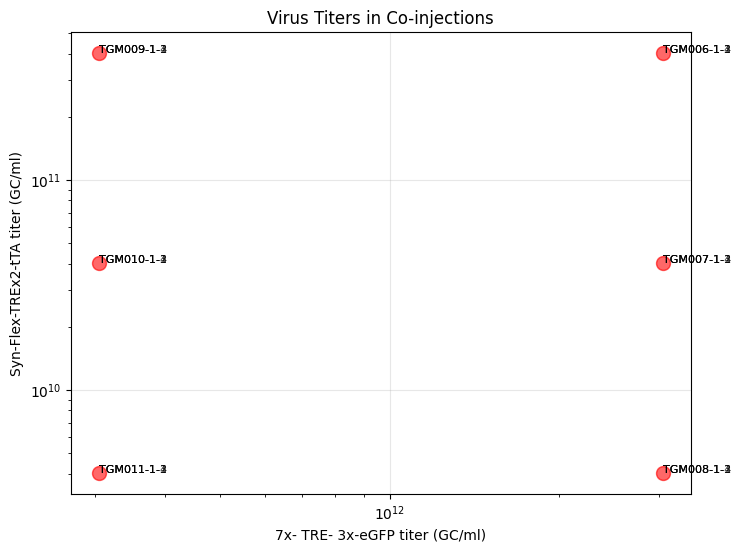

In [5]:
# plot virus co-injections

# Get all virus injections with their components and virus names
query = (lab.Surgery.VirusInjection * 
         lab.Surgery.VirusComponent * 
         lab.Virus)

data = query.fetch('subject_id', 'surgery_id', 'injection_id', 
                   'virus_name', 'effective_titer', as_dict=True)
df = pd.DataFrame(data)

# Pivot to wide format (one row per injection, one column per virus name)
pivot = df.pivot_table(
    index=['subject_id', 'surgery_id', 'injection_id'],
    columns='virus_name',
    values='effective_titer',
    fill_value=0
)

# Plot first two viruses
if len(pivot.columns) >= 2:
    virus1, virus2 = pivot.columns[0], pivot.columns[1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pivot[virus1], pivot[virus2], alpha=0.2, s=100,color='red')
    plt.xlabel(f'{virus1} titer (GC/ml)')
    plt.ylabel(f'{virus2} titer (GC/ml)')
    plt.title('Virus Titers in Co-injections')
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    
    # Add labels for each point
    for idx, row in pivot.iterrows():
        if row[virus1] > 0 or row[virus2] > 0:
            plt.annotate(f'{idx[0]}-{idx[1]}-{idx[2]}', 
                        (row[virus1], row[virus2]),
                        fontsize=8, alpha=0.7)
    
    plt.show()